> 단일 종목(코스피)에 대한 '코사인 유사도' 기반 패턴 검색 구현

```
1. 라이브러리 호출 및 코스피 지수 추출
2. 기준 구간 지정 및 시각화
3. 패턴 검색기 구현
4. 검색 구간 이후의 추세 확인
```

## 1. 라이브러리 호출 및 코스피 지수 추출

In [209]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# 1차월 배열간 코사인 유사도 계산
from scipy.spatial.distance import cosine

In [103]:
# 코스피 지수 추출
kospi = fdr.DataReader('KS11')

In [104]:
kospi

Close     Open     High      Low       Volume  Change
Date                                                               
1981-05-01   123.60   123.60   123.60   123.60    3330000.0  0.0098
1981-05-02   123.50   123.50   123.50   123.50    2040000.0 -0.0008
1981-05-04   120.60   120.60   120.60   120.60    1930000.0 -0.0235
1981-05-06   120.70   120.70   120.70   120.70    1690000.0  0.0008
1981-05-07   119.30   119.30   119.30   119.30    1480000.0 -0.0116
...             ...      ...      ...      ...          ...     ...
2021-09-10  3125.76  3121.09  3131.54  3103.38  723080000.0  0.0036
2021-09-13  3127.86  3117.35  3139.13  3109.01  732270000.0  0.0007
2021-09-14  3148.83  3137.32  3164.31  3137.32  713230000.0  0.0067
2021-09-15  3153.40  3147.21  3164.01  3138.80  616560000.0  0.0015
2021-09-16  3130.09  3165.38  3167.68  3126.65     604460.0 -0.0074

[10790 rows x 6 columns]

## 2. 기준 구간 지정 및 시각화

In [109]:
# 기준 기간 종가
kospi_close[d_start:d_end]

Date
2021-09-01    3207.02
2021-09-02    3175.85
2021-09-03    3201.06
2021-09-06    3203.33
2021-09-07    3187.42
2021-09-08    3162.99
2021-09-09    3114.70
2021-09-10    3125.76
2021-09-13    3127.86
2021-09-14    3148.83
2021-09-15    3153.40
2021-09-16    3130.09
Name: Close, dtype: float64

In [210]:
# 종가만 추출
kospi_close = kospi['Close']

# 비교 기준 구간
d_start = '2021-09-01'
d_end = '2021-09-16'

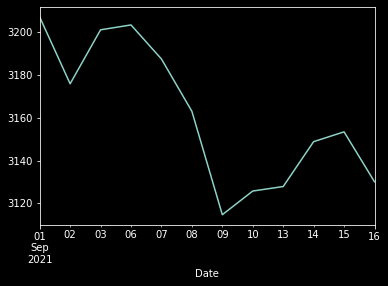

In [211]:
# 기준 구간 시계열 차트
kospi_close[d_start:d_end].plot();

## 3. 패턴 검색기 구현

In [201]:
count = 0
compare_base_r = kospi_close[d_start:d_end]
# series에서 값만 추출
compare_base = compare_base_r.values
# 표준화
compare_base_norm = (compare_base - compare_base.mean()) / compare_base.std()
# array -> 1차원 리스트로 변환
compare_base_norm = list(compare_base_norm)

# 검색 기간
window_size = len(compare_base_norm)
# 검색 기간에 더해서 추가로 보여줄 기간
next_date = 5
# 검색 횟수
moving_cnt = len(kospi_close) - (window_size-1) - next_date

# 유사도 저장 딕셔너리
sim_dict = {}

for i in range(moving_cnt):
    compare_target_r = kospi_close[i:i+window_size]
    # series에서 값만 추출
    compare_target = compare_target_r.values
    # 표준화
    compare_target_norm = (compare_target - compare_target.mean()) / compare_target.std() 
    # array -> 1차원 리스트로 변환
    compare_target_norm = list(compare_target_norm)

    # 코사인 유사도 저장
    sim = cosine(compare_base_norm, compare_target_norm)
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
    sim_dict[sim] = [i,compare_target_r]

In [203]:
# 최소 코사인 유사도
min_sim = min(list(sim_dict.keys()))
# 최소 코사인 유사도가 나온 인덱스, 기간 추출
sim_dict[min_sim]

[2689,
 Date
 1990-07-06    716.17
 1990-07-07    713.41
 1990-07-09    715.28
 1990-07-10    718.75
 1990-07-11    711.00
 1990-07-12    701.91
 1990-07-13    688.78
 1990-07-14    689.19
 1990-07-16    683.01
 1990-07-18    698.01
 1990-07-19    693.44
 1990-07-20    694.64
 Name: Close, dtype: float64]

In [223]:
# 표준화된 기준 구간 데이터 
compare_base_norm

[1.4339539201757012,
 0.45149073936036144,
 1.2460976302283338,
 1.3176469218693603,
 0.8161714901474522,
 0.04614981843365735,
 -1.4759274033043155,
 -1.1273216035026465,
 -1.0611306288567652,
 -0.400166467750014,
 -0.25612229911587053,
 -0.9908421176851828]

In [224]:
# 검색 구간 데이터 -> 값만 추출
compare_target = compare_target_r.values
# 검색 구간 데이터 표준화
compare_target_norm = (compare_target - compare_target.mean())/compare_target.std()
compare_target_norm = list(compare_target_norm)

# 표준화된 검색 구간 데이터
compare_target_norm

[1.1892892589786803,
 0.9581994364068187,
 1.1147711640189142,
 1.4053080061654246,
 0.7564144826393618,
 -0.004674824309274292,
 -1.1040260454573,
 -1.06969748485785,
 -1.5871377397470252,
 -0.33121479098690393,
 -0.7138526493758155,
 -0.6133788134750116]

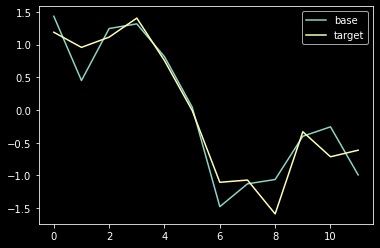

In [227]:
plt.plot(compare_base_norm, label='base')
plt.plot(compare_target_norm, label='target')
plt.legend()
plt.show()

## 4. 검색 구간 이후의 추세 확인

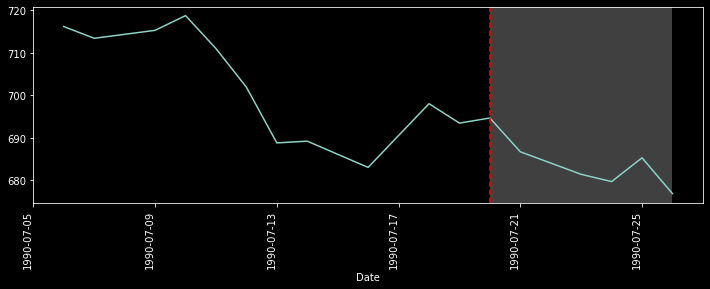

In [204]:
# 반복문 인덱스 복원
idx = sim_dict[min_sim][0]
# 반복문 타겟 구간 시계열 데이터 복원
compare_target_r = sim_dict[min_sim][1]

plt.figure(figsize=(12,4))
expanded_target_r = kospi_close[idx:idx+window_size+next_date]
expanded_target_r.plot()
plt.axvspan(compare_target_r.index[-1], expanded_target_r.index[-1], facecolor='gray', alpha=0.5)
plt.axvline(x=compare_target_r.index[-1], c='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()